In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from sharedcontrolpaper.force_sensitive_stopping_task_utils import plot_trial_pressure_individual, plot_bar_plots, create_summary_df_for_plotting

In [2]:
parent_directory = os.path.dirname(os.getcwd())
%store -r merged_df
%store -r duration_of_inhibition
%store -r shared_control_metrics

In [3]:
warnings.filterwarnings('ignore') # Ignore warnings

## Figure 2: A canonical trial

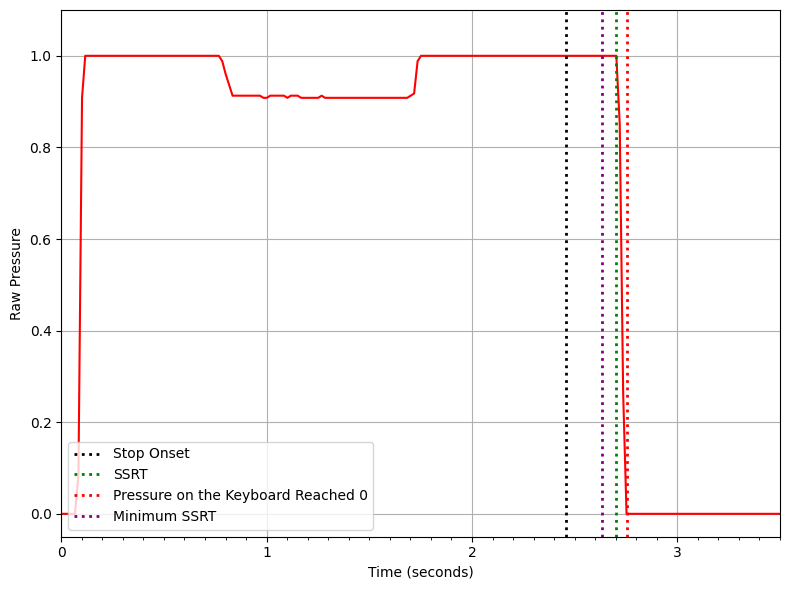

In [4]:
trial_results = shared_control_metrics['s007']['Non-AI']['trial_results']
target_trial_num = 20
trial_data = trial_results.get(target_trial_num)
plt.figure(figsize=(8, 6))
if trial_data:
    ax = plt.gca()
    plot_trial_pressure_individual(trial_data, target_trial_num, ax, color='red')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Raw Pressure')
    plt.savefig(f'{parent_directory}/figures/figure2.png')
    plt.tight_layout()
    plt.show()

## Figure 3: Non-AI vs AI-Disengaged SSRT

In [5]:
custom_names = {'non_ai': 'Non-AI', 'ai_failed': 'AI-failed'}
desired_order = ['Non-AI', 'AI-failed']


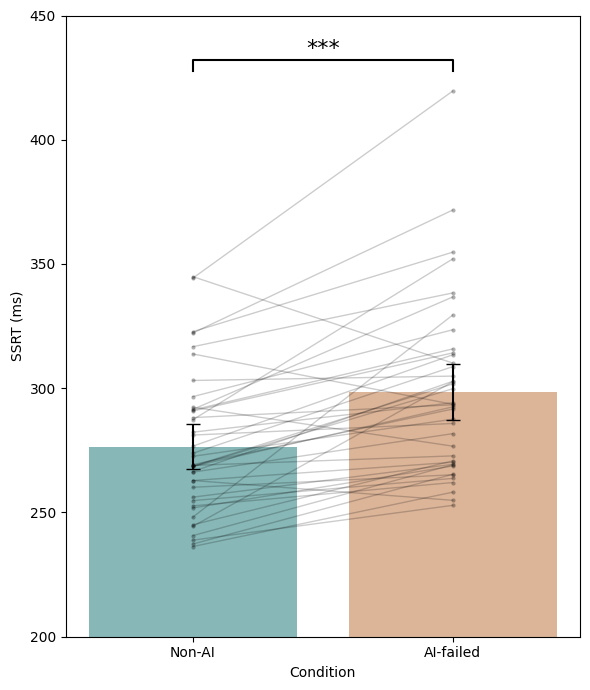

In [6]:
merged_df.reset_index(inplace=True)
melted_ssrt, summary_ssrt = create_summary_df_for_plotting(merged_df, 'SSRT', custom_names, desired_order)
plot_bar_plots(melted_ssrt, summary_ssrt, 'SSRT', 'SSRT (ms)', f'{parent_directory}/figures/figure3.png', ylim=(200, 450))

## Figure 4: Non-AI vs AI-Disengaged Duration of Inhibition

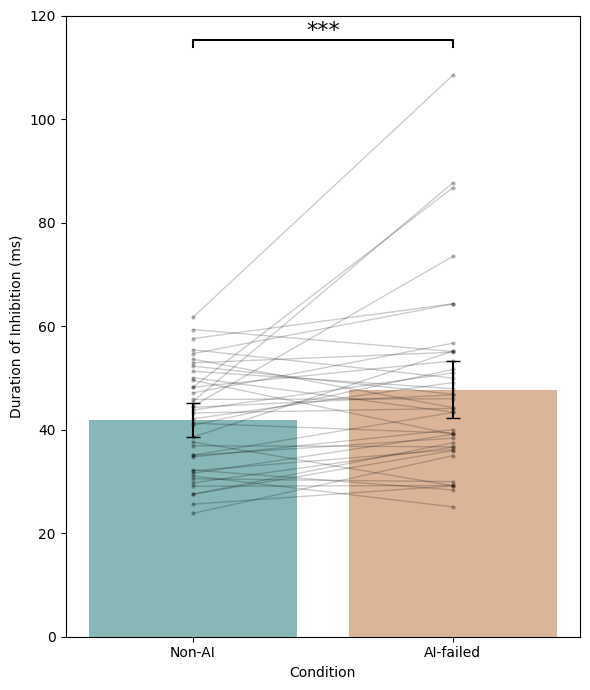

In [7]:
duration_of_inhibition.reset_index(inplace=True)
melted_duration, summary_duration = create_summary_df_for_plotting(duration_of_inhibition, 'Duration of Inhibition', custom_names, desired_order)
plot_bar_plots(melted_duration, summary_duration, 'Duration of Inhibition', 'Duration of Inhibition (ms)', f'{parent_directory}/figures/figure4.png', ylim=(0, 120))